In [ ]:
!pip install scikit-posthocs

In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare

import matplotlib.pyplot as plt

In [ ]:
excel_file_path = "./EnvironmentDriftNormalizedScore.xlsx"

In [ ]:
df = pd.read_excel(excel_file_path, sheet_name="Sheet1", usecols="B:E")
columns = {"ActionPredictor":"GPAction",
           "StatePredictor":"GPState",
           "AverageStepRewards(100)": "AveStepRew-100",
           "AverageStepRewards(200)": "AveStepRew-200"}

df = df.rename(columns=columns)

In [ ]:
print(df.head())

   GPAction   GPState  AveStepRew-100  AveStepRew-200
0 -0.548158 -0.650856       -0.340954        0.362668
1 -0.651486 -0.582601       -0.431182       -0.392416
2 -0.651486 -0.341501        1.018158       -0.104451
3 -0.616413 -0.617044       -0.256405        0.884742
4 -0.548158 -0.617044        0.122330        0.022153


In [ ]:
import scikit_posthocs as sp

In [ ]:
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(*df.T.values)
print('Friedman test statistics:', stat, 'P-value:', p)

Friedman test statistics: 633.9322709163349 P-value: 4.436100521199758e-137


In [ ]:
# Perform Nemenyi test
pc = sp.posthoc_nemenyi_friedman(df)
print(pc)

                GPAction  GPState  AveStepRew-100  AveStepRew-200
GPAction           1.000    0.001        0.001000        0.001000
GPState            0.001    1.000        0.001000        0.001000
AveStepRew-100     0.001    0.001        1.000000        0.261569
AveStepRew-200     0.001    0.001        0.261569        1.000000


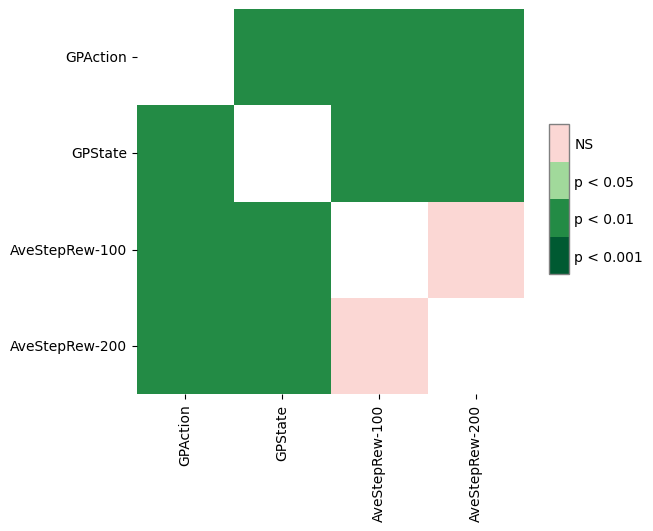

In [ ]:
# Plotting the results (heatmap of p-values)
plt.figure(figsize=(5, 5))
sp.sign_plot(pc)
plt.show()

In [ ]:
ranks = df.rank(ascending=True, axis=1, method="average")
avg_ranks = ranks.mean()

In [ ]:
avg_ranks

GPAction          1.391667
GPState           2.270833
AveStepRew-100    3.244792
AveStepRew-200    3.092708
dtype: float64

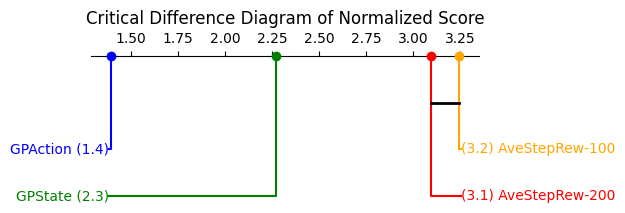

In [ ]:
plt.figure(figsize=(5, 2))
plt.title("Critical Difference Diagram of Normalized Score")
sp.critical_difference_diagram(avg_ranks, pc,
                               color_palette={"GPAction":"blue",
                                              "GPState": "green",
                                              "AveStepRew-100":"orange",
                                              "AveStepRew-200":"red"})
plt.savefig('cd_diagram_ns.png', format='png', dpi=300, bbox_inches='tight')
plt.show()